In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import random
from collections import Counter
import numpy as np
from itertools import cycle, islice

# Tempel

**tempel_limpio_full.dat**: DR12 SDSS sample of galaxies

    - galID   :ID galaxia (SDSS)
    - ra[rad] :Asención recta
    - dec[rad]:Declinacion
    - zCMB   :Galaxy redshift corrected to the CMB rest-frame.
    - rextAB :r-band observer-frame model apparent magnitud corrected for galactic extinction in AB system.
    - gextAB :g-band observer-frame model apparent magnitud corrected for galactic extinction in AB system.
    - uextAB :u-band observer-frame model apparent magnitud corrected for galactic extinction in AB system.
    - rabs :r-band k-corrected absolute magnitude.
    - gabs :g-band k-corrected absolute magnitude.
    - uabs :u-band k-corrected absolute magnitude.
    - pr50r
    - pr90r

In [2]:
path_gal_gru = '../../tempel_limpio_full.dat'


df = pd.read_table(path_gal_gru, sep="\s+", 
                   names=['galID', 'ra_rad', 'dec_rad', 'zCMB', 'rextAB', 'gextAB', 'uextAB','rabs','gabs','uabs','r50','r90'])

display(df.shape)
display(df.head(2))

/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(557560, 12)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
0,1237648674533278744,4.302659,0.006149,0.052364,17.364889,17.821471,18.909773,-18.737809,-18.279416,-17.279459,4.452624,8.327925
1,1237648674533475041,4.309919,0.005997,0.072661,16.853414,17.245356,18.359844,-19.985221,-19.580926,-18.556690,2.092882,5.799765


In [3]:
df.describe()

,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
count,557559.000000,557559.000000,557559.000000,557559.000000,557559.000000,557559.000000,5.575590e+05,5.575590e+05,5.575590e+05,557559.000000,557559.000000
mean,3.243881,0.472808,0.098996,16.841969,17.538159,19.117289,-4.288245e+04,-7.799938e+06,-1.829504e+05,2.494459,6.723816
std,0.660586,0.311077,0.044951,0.795484,32.870037,32.879931,1.343592e+07,2.449441e+09,5.756026e+07,4.739652,6.106722
min,1.915685,-0.065414,0.000146,9.446938,-9999.215704,-9999.329663,-4.868005e+09,-9.083556e+11,-2.149379e+10,-99.900000,-99.900000
25%,2.713526,0.212609,0.065501,16.508394,17.265486,18.679025,-2.126564e+01,-2.053466e+01,-1.892145e+01,1.787618,4.787714
50%,3.237212,0.452644,0.095587,17.071351,17.846251,19.315659,-2.064086e+01,-1.995347e+01,-1.838208e+01,2.311300,6.013941
75%,3.799847,0.707482,0.132439,17.416182,18.237686,19.927133,-1.985715e+01,-1.922515e+01,-1.773673e+01,3.083277,7.809261
max,4.570260,1.226423,0.199999,17.767403,20.485298,31.490886,-5.657943e+00,-4.260592e+00,5.316580e+01,125.092300,245.390600


In [4]:
#display(df.shape)
#df = df[df.applymap(np.isreal).all(1)]
display(df.shape)
df1 = df[(df['gextAB'] > 10) & (df['uextAB'] > 10)]
display(df1.shape)

(557560, 12)

(557552, 12)

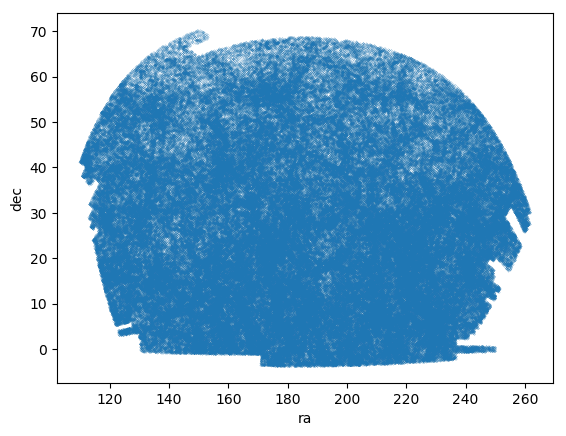

In [5]:
import math
pi = math.pi
plt.scatter(df1.ra_rad * 180/pi, df1.dec_rad * 180/pi, s= 0.01)
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()

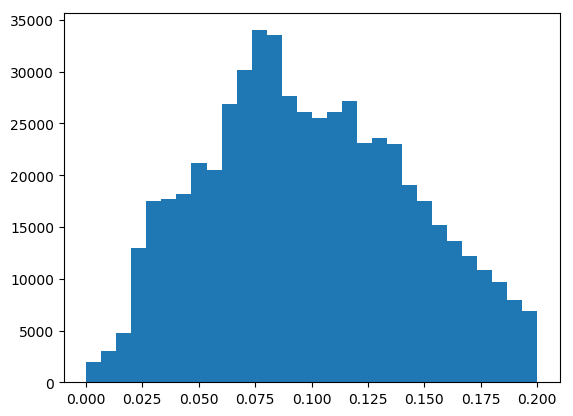

In [6]:
plt.hist(df1.zCMB, 30)
plt.show()

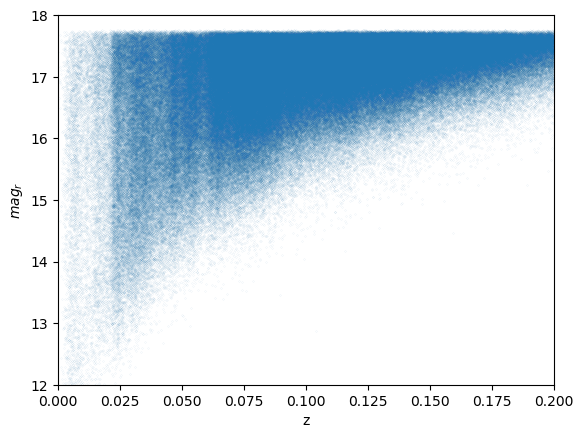

In [7]:
plt.scatter(df1.zCMB, df1.rextAB, s= 0.001)
plt.xlabel('z')
plt.ylabel(r'$mag_r$')
plt.xlim(0,0.2)
plt.ylim(12,18)
plt.show()

In [8]:
display(df1.shape)
df1.head(2)

(557552, 12)

,galID,ra_rad,dec_rad,zCMB,rextAB,gextAB,uextAB,rabs,gabs,uabs,r50,r90
0,1237648674533278744,4.302659,0.006149,0.052364,17.364889,17.821471,18.909773,-18.737809,-18.279416,-17.279459,4.452624,8.327925
1,1237648674533475041,4.309919,0.005997,0.072661,16.853414,17.245356,18.359844,-19.985221,-19.580926,-18.556690,2.092882,5.799765


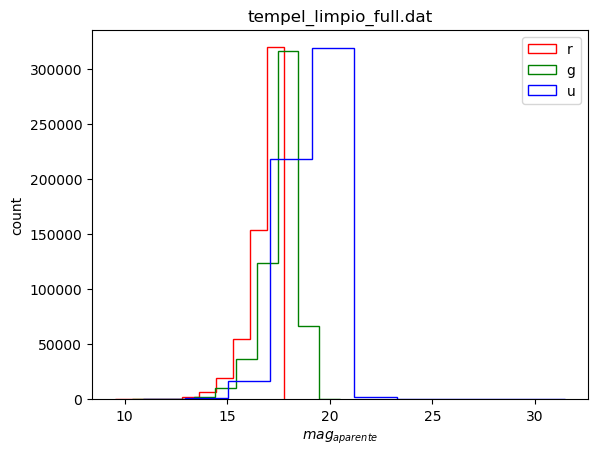

In [9]:
plt.hist(df1.rextAB, histtype='step', label='r', color='red')
plt.hist(df1.gextAB, histtype='step', label='g', color='green')
plt.hist(df1.uextAB, histtype='step', label='u', color='blue')
plt.ylabel('count')
plt.xlabel(r'$mag_{aparente}$')
plt.title('tempel_limpio_full.dat')
plt.legend()
plt.show()

## Color aparente g-r

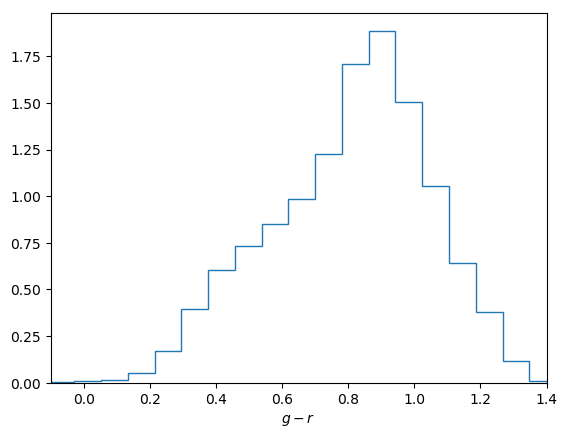

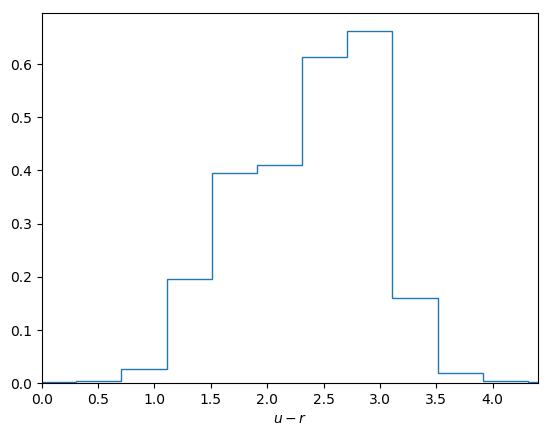

In [10]:
g_r = df1.gextAB - df1.rextAB
plt.hist(g_r, 50, histtype='step', density=True)
plt.xlim(-0.1, 1.4)
plt.xlabel(r'$g-r$')
plt.show()
u_r = df1.uextAB - df1.rextAB
plt.hist(u_r, 50, histtype='step', density=True)
plt.xlim(0.0, 4.4)
plt.xlabel(r'$u-r$')
plt.show()

## Color Mags Absolutas

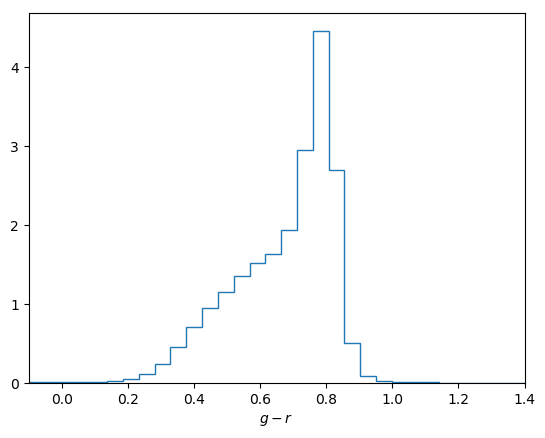

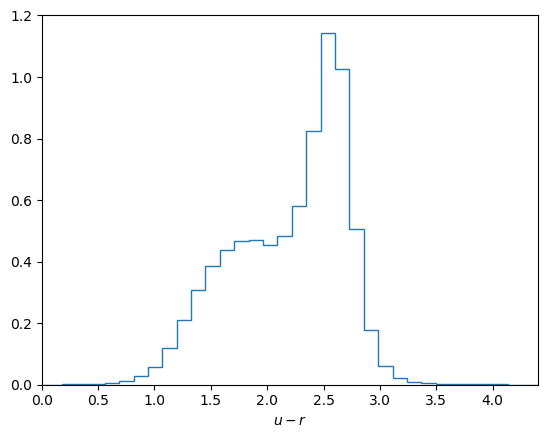

In [11]:
g_r = df1.gabs - df1.rabs
plt.hist(g_r, 500, histtype='step', density=True)
plt.xlim(-0.1, 1.4)
plt.xlabel(r'$g-r$')
plt.show()
u_r = df1.uabs - df1.rabs
plt.hist(u_r, 500, histtype='step', density=True)
plt.xlim(0.0, 4.4)
plt.xlabel(r'$u-r$')
plt.show()

## Radios Petro

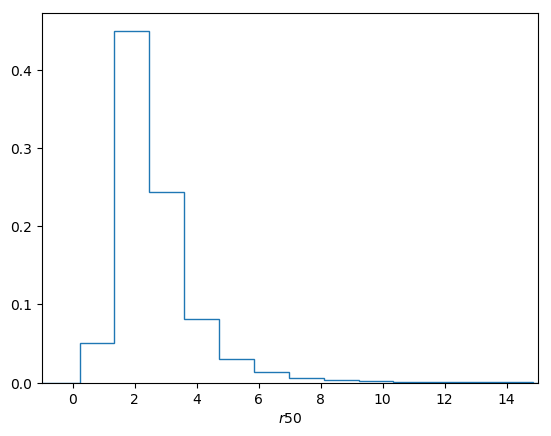

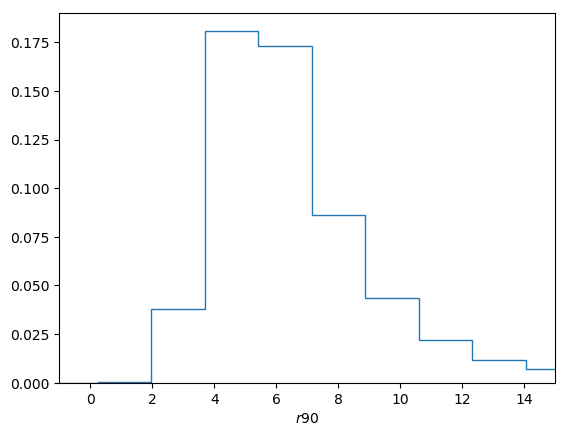

In [12]:
r50 = df1.r50
plt.hist(r50, 200, histtype='step', density=True)
plt.xlim(-1, 15)
plt.xlabel(r'$r50$')
plt.show()
r90 = df1.r90
plt.hist(r90, 200, histtype='step', density=True)
plt.xlim(-1, 15)
plt.xlabel(r'$r90$')
plt.show()

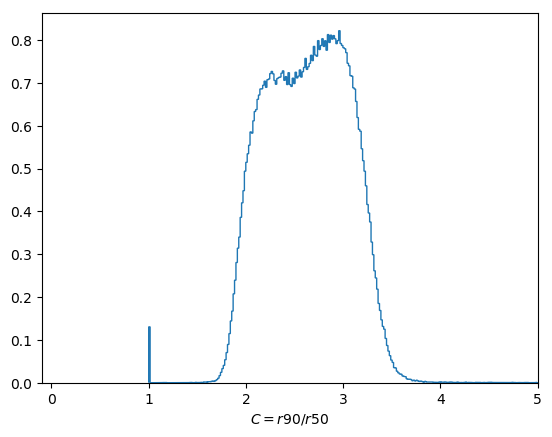

In [13]:
ty=r90/r50
plt.hist(ty, 2000, histtype='step', density=True)
plt.xlim(-0.1, 5)
plt.xlabel(r'$C=r90/r50$')
plt.show()

# **Correcion K**

In [14]:
dfk = pd.read_table("../../tempel_kcorr_full.dat", sep="\s+", names=['z', 'mr', 'kr', 'mg', 'kg', 'mu', 'ku'])
#dfk = pd.read_table("tempel_kcorr.dat", sep="\s+", names=['z', 'kr'])

/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [15]:
dfk.head(3)

,z,mr,kr,mg,kg,mu,ku
0,0.0523644,-18.737809,0.039653,-18.279416,0.037841,-17.279459,0.126186
1,0.0726613,-19.985221,0.033622,-19.580926,0.021269,-18.556690,0.111522
2,0.164124,-22.615471,0.191124,-21.722567,0.542133,-19.553588,0.656998


In [16]:
display(dfk.shape)
dfk = dfk[dfk.applymap(np.isreal).all(1)]
display(dfk.shape)

(557560, 7)

(524288, 7)

In [17]:
display(min(dfk.z), max(dfk.z))
display(min(dfk.kr), max(dfk.kr))
display(min(dfk.mr), max(dfk.mr))
display(min(dfk.mg), max(dfk.mg))

0.002990793

0.199999215

-15.275464595446474

0.2661166817020087

-24.757483973264044

-8.035602811519478

-31.28471477189545

-9.894293380909117

In [18]:
indx = np.where(
    (dfk.mu > -27.) & (dfk.mu < -15.)
    & (dfk.mg > -27.) & (dfk.mg < -15.)
    & (dfk.kr > -1.5) & (dfk.kg > -1.5)
    & (dfk.ku > -1.5) & (dfk.ku > -1.5))
display(np.shape(indx))


(1, 519914)

In [19]:
zz=dfk.z.values[indx]
r=dfk.mr.values[indx]
g=dfk.mg.values[indx]
u=dfk.mu.values[indx]
kkr=dfk.kr.values[indx]
kkg=dfk.kg.values[indx]
kku=dfk.ku.values[indx]


display(min(zz), max(zz))
display(min(r), max(r))
display(min(g), max(g))
display(min(kkr), max(kkr))
display(min(kkg), max(kkg))

0.003058093

0.199999215

-24.757483973264044

-14.984795809257712

-25.845297349050803

-15.005241747254134

-0.3980922192924143

0.2661166817020087

-1.499758384282238

2.2267011442389784

In [20]:
#dfk.values[indx]

In [21]:
display(kkr)
display(zz)

array([0.03965339, 0.03362195, 0.19112352, ..., 0.1857334 , 0.04153623,
       0.0931333 ])

array([0.052364394, 0.072661344, 0.164123905, ..., 0.184298854,
       0.120130195, 0.106441547], dtype=object)

In [22]:
kkr.shape

(519914,)

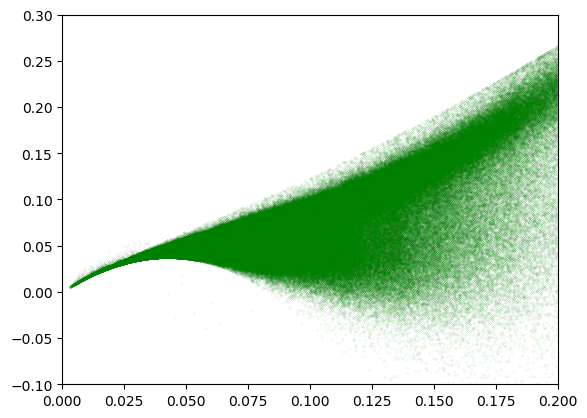

In [23]:
plt.plot(zz,kkr, 'g.',linestyle='None', markersize=0.10)

plt.xlim(0,0.2)
plt.ylim(-0.1,0.3)

plt.show()

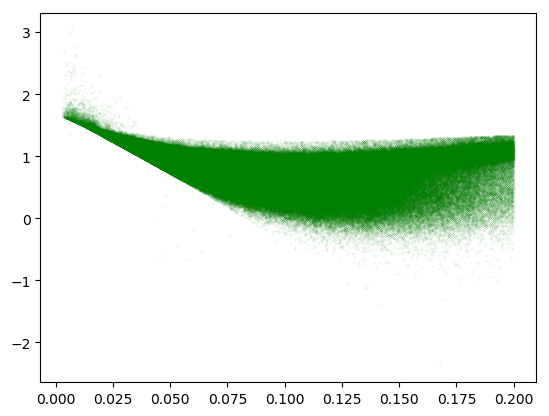

In [24]:
plt.plot(zz,kkr/zz, 'g.',linestyle='None', markersize=0.1)
plt.show()

## Muestra mas chica p/graficar

In [25]:
dfk1 = dfk[(dfk.mu > -27.) & (dfk.mu < -15.)
    & (dfk.mg > -27.) & (dfk.mg < -15.)
    & (dfk.kr > -1.5) & (dfk.kg > -1.5)
    & (dfk.ku > -1.5) & (dfk.ku > -1.5)]
display(np.shape(dfk1))
df_new=dfk1.sample(n=50000)
np.shape(df_new)
df_new.head(3)

(519914, 7)

,z,mr,kr,mg,kg,mu,ku
480890,0.133083,-20.910665,0.095097,-20.185633,0.299996,-18.525471,0.312156
291176,0.105714,-21.624078,0.063272,-20.965841,0.198858,-19.482155,0.201628
318620,0.120185,-22.334081,0.116781,-21.510120,0.332601,-19.565626,0.384433


In [26]:
zz=df_new.z.values
r=df_new.mr.values
g=df_new.mg.values
u=df_new.mu.values
kkr=df_new.kr.values
kkg=df_new.kg.values
kku=df_new.ku.values

In [27]:
ic1 = np.where(((u-r) > 0.0) & ((u-r)<= 1.5))
ic2 = np.where(((u-r) > 1.5) & ((u-r)<= 2.0))
ic3 = np.where(((u-r) > 2.0) & ((u-r)<= 2.5))
ic4 = np.where(((u-r) > 2.5) & ((u-r)<= 3.0))
ic5 = np.where(((u-r) > 3.0) & ((u-r)<= 4.0))
np.shape(ic1),np.shape(ic2),np.shape(ic3),np.shape(ic4),np.shape(ic5)

((1, 5688), (1, 11199), (1, 15319), (1, 17106), (1, 633))

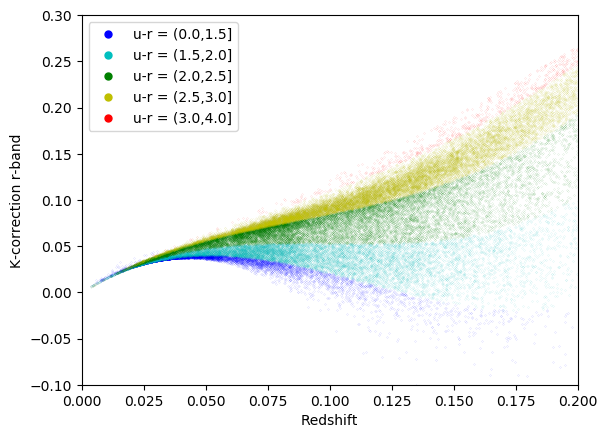

In [28]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kkr[ic1], 'b.', markersize=0.1,label='u-r = (0.0,1.5]') #,linestyle='None'
ax.plot(zz[ic2], kkr[ic2], 'c.', markersize=0.1,label='u-r = (1.5,2.0]')
ax.plot(zz[ic3], kkr[ic3], 'g.', markersize=0.1,label='u-r = (2.0,2.5]')
ax.plot(zz[ic4], kkr[ic4], 'y.', markersize=0.1,label='u-r = (2.5,3.0]')
ax.plot(zz[ic5], kkr[ic5], 'r.', markersize=0.1,label='u-r = (3.0,4.0]')

ax.set_xlim(0,0.2)
ax.set_ylim(-0.1,0.3)

ax.set_xlabel('Redshift')
ax.set_ylabel('K-correction r-band')
ax.legend(loc='upper left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()

#ax.set_rasterized(True)
#fig.savefig('test_kcorr.eps', format='eps')
#fig.savefig('test_kcorr.pdf', format='pdf')

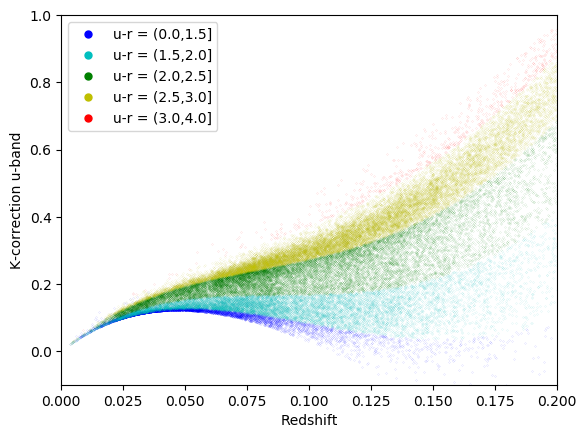

In [29]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kku[ic1], 'b.',linestyle='None', markersize=0.1,label='u-r = (0.0,1.5]')
ax.plot(zz[ic2], kku[ic2], 'c.',linestyle='None', markersize=0.1,label='u-r = (1.5,2.0]')
ax.plot(zz[ic3], kku[ic3], 'g.',linestyle='None', markersize=0.1,label='u-r = (2.0,2.5]')
ax.plot(zz[ic4], kku[ic4], 'y.',linestyle='None', markersize=0.1,label='u-r = (2.5,3.0]')
ax.plot(zz[ic5], kku[ic5], 'r.',linestyle='None', markersize=0.1,label='u-r = (3.0,4.0]')

ax.set_xlim(0,0.2)
ax.set_ylim(-0.1,1.0)

ax.set_xlabel('Redshift')
ax.set_ylabel('K-correction u-band')
ax.legend(loc='upper left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()
#ax.set_rasterized(True)
#fig.savefig('test_kcorr_u.eps', format='eps')

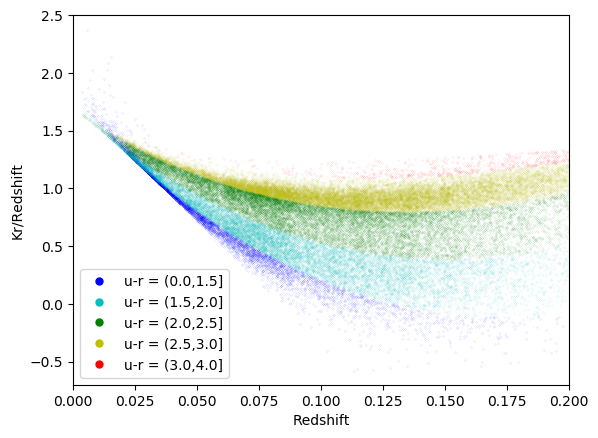

In [30]:
fig, ax = plt.subplots()
ax.plot(zz[ic1], kkr[ic1]/zz[ic1], 'b.',linestyle='None', markersize=0.1,label='u-r = (0.0,1.5]')
ax.plot(zz[ic2], kkr[ic2]/zz[ic2], 'c.',linestyle='None', markersize=0.1,label='u-r = (1.5,2.0]')
ax.plot(zz[ic3], kkr[ic3]/zz[ic3], 'g.',linestyle='None', markersize=0.1,label='u-r = (2.0,2.5]')
ax.plot(zz[ic4], kkr[ic4]/zz[ic4], 'y.',linestyle='None', markersize=0.1,label='u-r = (2.5,3.0]')
ax.plot(zz[ic5], kkr[ic5]/zz[ic5], 'r.',linestyle='None', markersize=0.1,label='u-r = (3.0,4.0]')
ax.set_xlim(0,0.2)
ax.set_ylim(-0.7,2.5)
ax.set_xlabel('Redshift')
ax.set_ylabel('Kr/Redshift')

plt.legend()
ax.legend(loc='lower left', markerscale=100., scatterpoints=2, fontsize=10)
plt.show()

# Color g-r (Mabs)

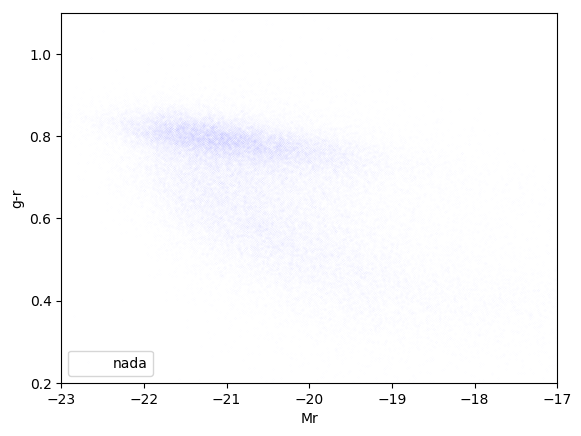

In [31]:
fig, ax = plt.subplots()
#ax.plot(r[ic1], g[ic1] - r[ic1], 'b.',linestyle='None', markersize=0.1,label='(0.0,0.4]')
#ax.plot(r[ic2], g[ic2] - r[ic2], 'c.',linestyle='None', markersize=0.1,label='(0.4,0.6]')
#ax.plot(r[ic3], g[ic3] - r[ic3], 'g.',linestyle='None', markersize=0.1,label='(0.6,0.7]')
#ax.plot(r[ic4], g[ic4] - r[ic4], 'y.',linestyle='None', markersize=0.1,label='(0.7,0.8]')
#ax.plot(r[ic5], g[ic5] - r[ic5], 'r.',linestyle='None', markersize=0.1,label='(0.8,1.0]')
ax.plot(r, g - r, 'b.',linestyle='None', markersize=0.01,label='nada')
ax.set_ylim(0.2,1.1)
ax.set_xlim(-23,-17)
ax.set_xlabel('Mr')
ax.set_ylabel('g-r')

ax.legend(loc='lower left')
plt.show()

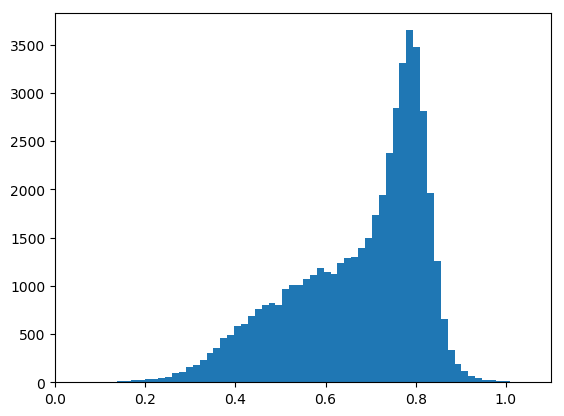

In [32]:
fig, ax = plt.subplots()
ax.hist(g - r, 200)
ax.set_xlim(0,1.1)
plt.show()

In [33]:
np.shape(g - r),min(g-r),max(g-r)

((50000,), -1.2679274327441945, 1.7875593331620188)

In [34]:
color=g - r
c1=np.where((r >= -23.) & (r < -22.))

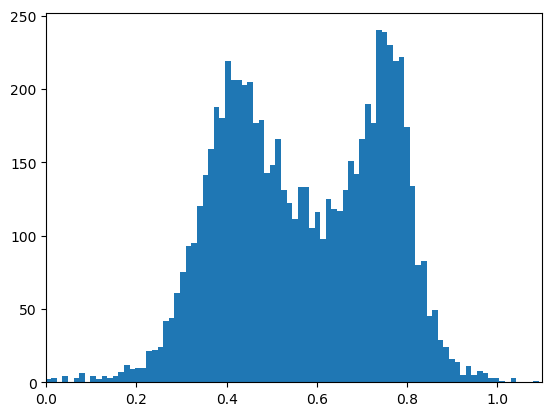

In [35]:
iz = np.where((zz>0.0) & (zz<0.05))
fig, ax = plt.subplots()
ax.hist(g[iz] - r[iz], 200)
ax.set_xlim(0,1.1)
plt.show()

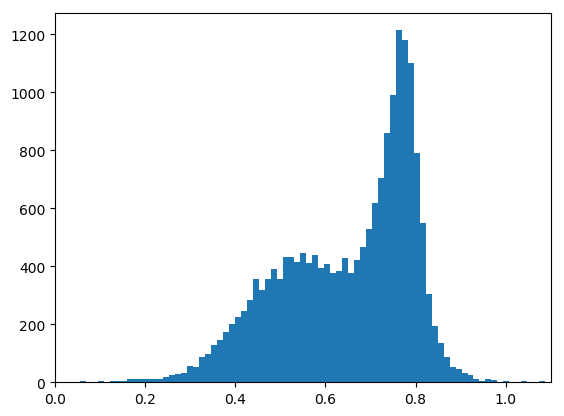

In [36]:
iz = np.where((zz>0.05) & (zz<0.1))
fig, ax = plt.subplots()
ax.hist(g[iz] - r[iz], 200)
ax.set_xlim(0,1.1)
plt.show()

## GaussianMixture

In [37]:
xx=np.arange(-22.5,-17,0.4)
xx

array([-22.5, -22.1, -21.7, -21.3, -20.9, -20.5, -20.1, -19.7, -19.3,
       -18.9, -18.5, -18.1, -17.7, -17.3])

(6686,)

(6686, 1)

array([[0.80247633],
       [0.6865592 ]])

<bound method BaseMixture.score_samples of GaussianMixture(n_components=2, random_state=0)>

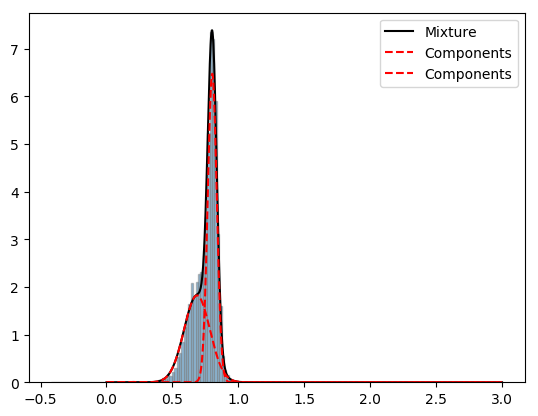

In [38]:
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
for i in range(2,3):
    icol = np.where((r >= xx[i]) & (r < xx[i+1])) 
    col = color[icol]
    display(np.shape(col)) 
    col = col.reshape(-1, 1)
    display(np.shape(col))    
    gm = GaussianMixture(n_components=2, random_state=0).fit(col)
    display(gm.means_)
    weights = gm.weights_
    means = gm.means_
    covars = gm.covariances_
    plt.hist(col, bins=100, histtype='bar', density=True, ec='grey', alpha=0.5)
    #plt.plot(col,weights[0]*stats.norm.pdf(col,means[0],np.sqrt(covars[0])))
    #plt.rcParams['agg.path.chunksize'] = 10000
    x_range = np.linspace(0, 3, 1000)
    pdf = np.exp(gm.score_samples(x_range.reshape(-1, 1)))
    responsibilities = gm.predict_proba(x_range.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    plt.plot(x_range, pdf, '-k', label='Mixture')
    plt.plot(x_range, pdf_individual, '--r', label='Components')
    plt.legend()
    display(gm.score_samples)
    plt.show()
    

## Clean data

In [39]:
display('Valores faltantes',dfk.notnull().all().to_frame())
display('Estadísticos del dataset',dfk.z.describe())
display('Estadísticos del dataset',dfk.mr.describe())
display('Estadísticos del dataset',dfk.kr.describe())
display('Estadísticos del dataset',dfk.mg.describe())
display('Estadísticos del dataset',dfk.kg.describe())

'Valores faltantes'

,0
z,True
mr,True
kr,True
mg,True
kg,True
mu,True
ku,True


'Estadísticos del dataset'

count     524288.000000
unique    523441.000000
top            0.084863
freq           3.000000
Name: z, dtype: float64

'Estadísticos del dataset'

count    524288.000000
mean        -20.455158
std           1.154228
min         -24.757484
25%         -21.265806
50%         -20.641106
75%         -19.859306
max          -8.035603
Name: mr, dtype: float64

'Estadísticos del dataset'

count    524288.000000
mean          0.074205
std           0.061023
min         -15.275465
25%           0.040477
50%           0.065258
75%           0.099111
max           0.266117
Name: kr, dtype: float64

'Estadísticos del dataset'

count    524288.000000
mean        -19.782791
std           1.075588
min         -31.284715
25%         -20.534801
50%         -19.953879
75%         -19.227057
max          -9.894293
Name: mg, dtype: float64

'Estadísticos del dataset'

count    524288.000000
mean          0.206128
std           0.158464
min          -7.531051
25%           0.083927
50%           0.179226
75%           0.298682
max           6.045843
Name: kg, dtype: float64

In [40]:
#Valores duplicados
dfk[dfk.duplicated()].sort_values(['z'])

,z,mr,kr,mg,kg,mu,ku


In [41]:
dfk['mr'] = dfk['mr'].astype(float, errors = 'raise')

In [42]:
#dfk[dfk.ku.str.contains('*************')]
#dfk[dfk.ku.str.contains(-99.99)]

In [43]:
#df_raro = dfk[dfk.kr == '*************']

In [44]:
#df_raro

In [45]:
#dfk.kr.hist()

In [46]:
#dfk.select_dtypes(['float']).columns
#dfk.select_dtypes(['string']).columns
#dfk.select_dtypes(['object']).columns

In [47]:
#dfk.iloc[dfk.z.dtypes == np.float64, :]

In [48]:
is_NaN = dfk.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dfk[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [z, mr, kr, mg, kg, mu, ku]
Index: []


In [49]:
dfna= dfk[dfk['mr'].isna()]

In [50]:
dfna.shape

(0, 7)

In [51]:
#dfk2=dfk.fillna(-999)
#df. dropna() 

In [52]:
cdf = dfk[~dfk.applymap(np.isreal).all(1)]

In [53]:
display(cdf.min())
display(cdf.max())

z    NaN
mr   NaN
kr   NaN
mg   NaN
kg   NaN
mu   NaN
ku   NaN
dtype: float64

z    NaN
mr   NaN
kr   NaN
mg   NaN
kg   NaN
mu   NaN
ku   NaN
dtype: float64

In [54]:
#cdf.mr.hist()

In [55]:
cdf.shape

(0, 7)

In [56]:
bfk = dfk[dfk.applymap(np.isreal).all(1)]

In [57]:
bfk.head(10)

,z,mr,kr,mg,kg,mu,ku
0,0.0523644,-18.737809,0.039653,-18.279416,0.037841,-17.279459,0.126186
1,0.0726613,-19.985221,0.033622,-19.580926,0.021269,-18.556690,0.111522
2,0.164124,-22.615471,0.191124,-21.722567,0.542133,-19.553588,0.656998
3,0.0682713,-21.055557,0.070048,-20.274898,0.164020,-18.480570,0.236256
4,0.0750807,-20.128469,0.053055,-19.515439,0.127579,-18.123988,0.167187
5,0.0873236,-19.808906,0.085715,-18.967248,0.231497,-17.141538,0.283969
6,0.0682207,-19.281626,0.042988,-18.756575,0.077092,-17.579661,0.135537
7,0.134727,-20.916685,0.138491,-20.114406,0.352763,-18.048850,0.461221
8,0.186074,-21.747605,0.186614,-20.942012,0.574705,-19.108826,0.652410
9,0.186451,-21.645719,0.125141,-20.929446,0.401270,-19.427039,0.456358


In [58]:
bfk.shape


(524288, 7)

In [59]:
bfk.mr.dtype

dtype('float64')

In [60]:
bfk['mr'] = bfk['mr'].astype(float, errors = 'raise')

In [61]:
bfk['mr'].dtype

dtype('float64')

In [62]:
bfk.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3819768550>,
      dtype=object)